<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Introducción: Medidas de Distancia y Similitud.</font>
    
___

## Introducción

Ya que se tiene determinado el tipo de dato a utilizar, se pueden realizar una medida de similitud
proponiendo el índice adecuado apropiado. 

>La primera y más importante es evitar la combinación de datos, esto debido a que cada tipo de dato presenta características propias que no comparten con los de otra naturaleza.

>Un índice de similitud $\delta_{i,j}$ es una medida de que tan parecido es un dato $i$ con otro $j$. Generalmente, las similaridades están acotadas en el rango de cero a uno; un aumento en la similaridad implica un aumento de la semejanza entre datos o variables, y toda similaridad de un dato consigo mismo debería ser igual al máximo valor posible, es decir, uno.

>Las distancias en cambio disminuyen con un aumento del parecido, no son negativas y la distancia de un elemento consigo mismo es cero. Tanto las matrices de similaridades como las de distancias son simétricas; es decir, la distancia entre el individuo `a` y el `b` es la misma que entre el `b` y el `a`.

>Dependiendo del método elegido para la ordenación, la clasificación, o el cálculo de índices de diversidad, así como de la escala de medición de los rasgos funcionales, la asociación entre los datos se expresará en términos de similaridad o distancia. Sin embargo, las similaridades pueden transformarse en distancias y viceversa.

Para el rango cero-uno, la similaridad $\delta_{i,j}$ puede ser transformada a distancia $d_{i,j}$ de la siguientes
formas:

$$d_{i,j} = 1 - \delta_{i,j}$$

$$d_{i,j} = \sqrt{1-\delta_{i,j}}$$

$$d_{i,j} = \sqrt{\delta_{i,j} -2\delta_{i,j} + \delta_{i,j}}$$

$$d_{i,j} = -\log{(\delta_{i,j})}$$

>El uso de índices de diversidad funcional basados en distancias, así como los métodos de
clasificación y/o de ordenación requiere una comprensión de las propiedades de la escala de
medición de los rasgos funcionales de las especies, y de las características de las medidas de
semejanza asociadas a cada tipo de datos.

## Similitud en Datos de Doble Estado o Binarios

Cuando la matriz de datos $X$, proviene de la observación de $n$ atributos que toman el valor 0 si la característica está ausente y el valor 1 si está presente, la información del grado de asociación entre cualquier par de individuos y puede representarse como una tabla de contingencia de 2x2 conocida conmunmente como **Matriz de Confusión**.

|             |               |               |$Muestra_j$   |         |
|:-----------:| ------------- |:-------------:|:------------:|:-------:|
|             |               |**Presente(1)**|**Ausente(0)**|         |
|             |**Presente(1)**|        a      |       b      |`a+b`    |
|$Muestra_i$  |**Ausente(0)** |        c      |       d      |`c+d`    |
|             |               |      `a+c`    |     `b+d`    |`a+b+c+d`|     

Donde $a$ es el número de caracteres presentes comunes, $b$ es el número de caracteres presente en
$i$ pero no en $j$, $c$ es el número de caracteres presentes en $j$ pero no presentes en $i$ y d es número
de caracteres no presentes en ambos datos. Para la matriz $X$ de dimensión $m × n$, es posible crear
o construir $\frac{n(n−1)}{2}$ Matrices de Confusión. 

Se han propuesto diversas medidas de similaridad que verifican estas propiedades, entre otros, Jaccard (1908), Rusell y Rao (1940), Sorensen (1948) y Sokal y Michener (1958). Sin embargo, existen similitudes que no verifican las propiedades de simetría y rango tales como la de Kulczynski (1970) acotada en el rango $[0,“ )$ y otros que expresan dependencia estocástica entre $x_i$ y $x_j$ como son las de Yule (1912) y la de Pearson (1926), acotadas en el rango $(-1,1)$, donde la mayor disimilaridad corresponde a $-1$, la similaridad total a $1$ y el valor 0 se asocia a la independencia estocástica.

> No existe un criterio universal de cuándo usar una u otra similitud. Los diferentes autores que han abordado el tema coinciden en que la elección de una determinada similitud dependerá del peso que se desea dar a las frecuencias de $a$, $b$, $c$ y $d$, del tipo de datos que se quieran representar y de la situación experimental (Legendre y Legendre 1979, Gower y Legendre 1986).

|Similaridad          |                                            | Simetría  | Rango         |
|:-------------------:|:------------------------------------------:|:---------:|:--------------:|
|Emparejamiento simple| $\frac{a+d}{a+b+c+d}$                      |si         |[0,1]        |
|Rogers y Tanimoto    | $\frac{a+d}{a+2b+2c+d}$                    |si         |[0,1]        |
|Hamman               | $\frac{(a+d)-(b+c)}{a+2b+2c+d}$            |si         |[-1,1]      |
|Yule                 | $\frac{ad-bc}{ad+bc}$                      |si         |[-1,1]       |
|Pearson              | $\frac{ad-bc}{\sqrt((a+c)(b+d)(a+b)(c+d))}$|si         |[-1,1]       |
|Jaccard              | $\frac{b+c}{a+b+c}$                        |No         |[0,1]        |
|Russel y Rao         | $\frac{a}{a+b+c+d}$                        |No         |[0,1]        |




No hay que olvidar que cada índice de similitud tiene propiedades distintas por lo que hay que
considerar el objetivo que se quiere obtener para elegir el índice adecuado.

In [1]:
import numpy as np
import pandas as pd

In [2]:
muestra_i = [0,1,1,0,0,1,1,1,0,1]
muestra_j = [1,0,0,1,0,1,0,1,1,1]


In [3]:
a=3
b=3
c=3
d=1

MatCon_ij = np.array([[a,b],[c,d]])
MatCon_ij

array([[3, 3],
       [3, 1]])

In [4]:
from sklearn.metrics import confusion_matrix


In [5]:
confusion_matrix(muestra_i,muestra_j)

array([[1, 3],
       [3, 3]])

### Similitud Simple

In [6]:
simp = (a+d)/(a+b+c+d)
simp

0.4

### Jaccard
jac = (b+c)/(a+b+c)

In [7]:
jac = (b+c)/(a+b+c)
jac

0.6666666666666666

In [8]:
from scipy.spatial.distance import jaccard


In [9]:
import scipy.spatial.distance as sc

In [10]:
jaccard(muestra_i,muestra_j)

0.6666666666666666

In [11]:
sc.jaccard(muestra_i,muestra_j)

0.6666666666666666

In [15]:
sc.jaccard(muestra_j,muestra_i)

0.6666666666666666

In [12]:
muestra_k = [1,1,1,1,0,0,0,1,1,1]

In [13]:
mat = np.array([muestra_i,muestra_j,muestra_k])
mat

array([[0, 1, 1, 0, 0, 1, 1, 1, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 0, 0, 1, 1, 1]])

In [14]:
sc.pdist(mat,'jaccard')

array([0.66666667, 0.55555556, 0.375     ])

In [16]:
sim_ijk = sc.pdist(mat,'jaccard')
sim_ijk

array([0.66666667, 0.55555556, 0.375     ])

### Matriz de Similitud

In [17]:
sc.squareform(sim_ijk)

array([[0.        , 0.66666667, 0.55555556],
       [0.66666667, 0.        , 0.375     ],
       [0.55555556, 0.375     , 0.        ]])

## Similitud en Datos multi estado Nominales 

Si las categorías para cada variable son codificadas por ejemplo, como: $0,1, 2, 3, . . . , k,$ el grado de
asociación entre cualquier par de individuos $x_i$ y $x_j$ puede medirse a través de la expansión del
emparejamiento simple que se expresará como:

$$d_{ij}=\frac{número\_de\_caracteres\_coincidentes}{número\_total\_de\_caracteres}$$

No obstante, cuando el cero representa ausencia del carácter es recomendable ignorar el empate
de ceros en forma similar como lo hace `Jaccard`.

Para el tratamiento de las variables ‘indicadoras excluyentes’ pueden utilizarse dos estrategias: 

>Uso de variables `‘auxiliares’` (dummy) o desdoblamiento en tantas variables como estados posibles presentes de la categoría.

En el caso de variables ‘auxiliares’ cada variable estará representada por tantas pseudo variables como número de estados diferentes menos uno. 

Así cada categoría tendrá asociado un perfil con un 1 en el estado en que se encuentre, estando el último estado representado solo por ceros.

>Cuando se realiza el desdoblamiento de una variable nominal en todos sus posibles estados, se
identifica la presencia o ausencia de cada estado del rasgo funcional en estudio, pero como estos
estados son excluyentes cada especie tendrá un solo valor de presencia (1) y el resto serán ceros.

In [ ]:
categorias_color = ['Rojo', 'Verde', 'Naranja'] 
categorias_carro = ['Jetta', 'Chevy', 'Tsuru', 'Ferray']

categorias_color_codes = [0,1,2]
categorias_color_carro = [0,1,2,3]
#                   0 0 1
#                   0 1 0
#                   1 0 0

categorias_codes = [0,1,2]


Mi = ['Rojo', 'Jetta'] = [0,0]
Mj = ['Naranja', 'Ferrari'] = [2, 3]


Mi = [0, 0, 1, 0, 0, 0, 1]
Mj = [1, 0, 0, 1, 0, 0, 0]



In [18]:
df_bank = pd.read_csv('Data/bank.csv')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [21]:
df_bank_cat = df_bank.select_dtypes(include=['object'])
df_bank_cat

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [22]:
df_bank_cat_nom = df_bank_cat[['job','marital','contact','poutcome']]
df_bank_cat_nom

,job,marital,contact,poutcome
0,unemployed,married,cellular,unknown
1,services,married,cellular,failure
2,management,single,cellular,failure
3,management,married,unknown,unknown
4,blue-collar,married,unknown,unknown
...,...,...,...,...
4516,services,married,cellular,unknown
4517,self-employed,married,unknown,unknown
4518,technician,married,cellular,unknown
4519,blue-collar,married,cellular,other


In [23]:
df_bank_cat_nom['job'].unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [25]:
df_bank_cat_nom['job'].nunique()

12

In [26]:
dummy_job = pd.get_dummies(df_bank_cat['job'], prefix='job')
dummy_job

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,0,0
4517,0,0,0,0,0,0,1,0,0,0,0,0
4518,0,0,0,0,0,0,0,0,0,1,0,0
4519,0,1,0,0,0,0,0,0,0,0,0,0


In [27]:
cat_nominales = ['job','marital','contact','poutcome']

# Variables dummies para los datos categóricos nominales

df_bank_cat_nom_dummy = pd.get_dummies(df_bank_cat[cat_nominales[0]], prefix = cat_nominales[0])

for col in cat_nominales[1:]:
    temp = pd.get_dummies(df_bank_cat_nom[col], prefix=col)
    df_bank_cat_nom_dummy = df_bank_cat_nom_dummy.join(temp)

del temp

df_bank_cat_nom_dummy


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4517,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4518,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
4519,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [30]:
def transform_dummies(df,cat_nominales):
    '''
    input df: df is a dataframe of...
    output df_cat_dummy: 
    Esta función es para transformación de dummies...
    '''
    df_cat_dummy = pd.get_dummies(df[cat_nominales[0]], prefix = cat_nominales[0])

    for col in cat_nominales[1:]:
        temp = pd.get_dummies(df[col], prefix=col)
        df_cat_dummy = df_cat_dummy.join(temp)

    del temp

    return df_cat_dummy

In [31]:
transform_dummies(df_bank_cat,cat_nominales)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4517,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4518,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
4519,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [32]:
help(transform_dummies)

Help on function transform_dummies in module __main__:

transform_dummies(df, cat_nominales)
    Esta función es para transformación de dummies...



In [34]:
sim_bank_cat_nom = sc.pdist(df_bank_cat_nom_dummy, 'jaccard')


In [35]:
sim_bank_cat_nom

array([0.66666667, 0.85714286, 0.66666667, ..., 0.66666667, 0.85714286,
       0.66666667])

In [36]:
# Matriz de similitud de df_bank_cat_nom
MSim = sc.squareform(sim_bank_cat_nom)
MSim

array([[0.        , 0.66666667, 0.85714286, ..., 0.4       , 0.66666667,
        0.85714286],
       [0.66666667, 0.        , 0.66666667, ..., 0.66666667, 0.66666667,
        0.85714286],
       [0.85714286, 0.66666667, 0.        , ..., 0.85714286, 0.85714286,
        0.66666667],
       ...,
       [0.4       , 0.66666667, 0.85714286, ..., 0.        , 0.66666667,
        0.85714286],
       [0.66666667, 0.66666667, 0.85714286, ..., 0.66666667, 0.        ,
        0.66666667],
       [0.85714286, 0.85714286, 0.66666667, ..., 0.85714286, 0.66666667,
        0.        ]])

In [38]:
df_MSim = pd.DataFrame(MSim)
df_MSim

,0,1,2,3,4,5,6,7,8,9,...,4511,4512,4513,4514,4515,4516,4517,4518,4519,4520
0,0.000000,0.666667,0.857143,0.666667,0.666667,0.857143,0.666667,0.400000,0.666667,0.666667,...,0.666667,0.666667,0.400000,0.666667,0.666667,0.400000,0.666667,0.400000,0.666667,0.857143
1,0.666667,0.000000,0.666667,0.857143,0.857143,0.666667,0.666667,0.666667,0.857143,0.000000,...,0.857143,0.857143,0.666667,0.400000,0.666667,0.400000,0.857143,0.666667,0.666667,0.857143
2,0.857143,0.666667,0.000000,0.857143,1.000000,0.000000,0.857143,0.857143,1.000000,0.666667,...,1.000000,1.000000,0.857143,0.666667,0.666667,0.857143,1.000000,0.857143,0.857143,0.666667
3,0.666667,0.857143,0.857143,0.000000,0.400000,0.857143,0.857143,0.666667,0.400000,0.857143,...,0.400000,0.400000,0.666667,0.857143,0.857143,0.666667,0.400000,0.666667,0.857143,1.000000
4,0.666667,0.857143,1.000000,0.400000,0.000000,1.000000,0.857143,0.666667,0.400000,0.857143,...,0.000000,0.000000,0.400000,0.666667,0.857143,0.666667,0.400000,0.666667,0.666667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.400000,0.400000,0.857143,0.666667,0.666667,0.857143,0.666667,0.400000,0.666667,0.400000,...,0.666667,0.666667,0.400000,0.666667,0.400000,0.000000,0.666667,0.400000,0.666667,0.857143
4517,0.666667,0.857143,1.000000,0.400000,0.400000,1.000000,0.666667,0.666667,0.400000,0.857143,...,0.400000,0.400000,0.666667,0.857143,0.857143,0.666667,0.000000,0.666667,0.857143,1.000000
4518,0.400000,0.666667,0.857143,0.666667,0.666667,0.857143,0.666667,0.000000,0.666667,0.666667,...,0.666667,0.666667,0.400000,0.666667,0.666667,0.400000,0.666667,0.000000,0.666667,0.857143
4519,0.666667,0.666667,0.857143,0.857143,0.666667,0.857143,0.400000,0.666667,0.857143,0.666667,...,0.666667,0.666667,0.400000,0.400000,0.857143,0.666667,0.857143,0.666667,0.000000,0.666667


## Similitud en Datos Multi Estado Ordinales 


Las variables ordinales pueden considerarse como variables cuantitativas si la asignación del ranking refleja en cierta forma una diferencia entre los estados de la variable. Por
ejemplo, si se considera la resistencia al fuego de un conjunto de muestras usando las categorías:
`muy baja`, `baja`, `media`, `alta` y `muy alta`; puede ser razonable asignarle valores: 0, 1, 2, 3, 4,
respectivamente ya que las categorías consecutivas pueden considerarse como equidistantes. De
esta manera, la nueva variable numérica podría ser tratada como una variable cuantitativa. 

In [39]:
data = {'Gender':['M','F','F','M','F','F','F'],
        'Name': ['John', 'Camila', 'Rhena', 'Joseph','Ana', 'Sara', 'Alexa'],
       'Grado': ['primary','primary','second','tirth', 'second', 'tirth','primary' ]}

df = pd.DataFrame(data)
df

,Gender,Name,Grado
0,M,John,primary
1,F,Camila,primary
2,F,Rhena,second
3,M,Joseph,tirth
4,F,Ana,second
5,F,Sara,tirth
6,F,Alexa,primary


In [40]:
df['Grado']

0    primary
1    primary
2     second
3      tirth
4     second
5      tirth
6    primary
Name: Grado, dtype: object

In [43]:
df['Grado'] = df['Grado'].astype('category')
df['Grado']

0    primary
1    primary
2     second
3      tirth
4     second
5      tirth
6    primary
Name: Grado, dtype: category
Categories (3, object): ['primary', 'second', 'tirth']

In [45]:
df['Grado'].cat.codes

0    0
1    0
2    1
3    2
4    1
5    2
6    0
dtype: int8

In [46]:
df['Grado_codes'] = df['Grado'].cat.codes

In [47]:
df

,Gender,Name,Grado,Grado_codes
0,M,John,primary,0
1,F,Camila,primary,0
2,F,Rhena,second,1
3,M,Joseph,tirth,2
4,F,Ana,second,1
5,F,Sara,tirth,2
6,F,Alexa,primary,0


In [48]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [57]:
df_bank_cat_ord = df_bank[['education','month']].astype('category')
df_bank_cat_ord

,education,month
0,primary,oct
1,secondary,may
2,tertiary,apr
3,tertiary,jun
4,secondary,may
...,...,...
4516,secondary,jul
4517,tertiary,may
4518,secondary,aug
4519,secondary,feb


In [58]:
df_bank_cat_ord['education']

0         primary
1       secondary
2        tertiary
3        tertiary
4       secondary
          ...    
4516    secondary
4517     tertiary
4518    secondary
4519    secondary
4520     tertiary
Name: education, Length: 4521, dtype: category
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']

In [59]:
df_bank_cat_ord['education_codes']  = df_bank_cat_ord['education'].cat.codes

In [60]:
df_bank_cat_ord['month_codes'] = df_bank_cat_ord['month'].cat.codes

In [61]:
df_bank_cat_ord

,education,month,education_codes,month_codes
0,primary,oct,0,10
1,secondary,may,1,8
2,tertiary,apr,2,0
3,tertiary,jun,2,6
4,secondary,may,1,8
...,...,...,...,...
4516,secondary,jul,1,5
4517,tertiary,may,2,8
4518,secondary,aug,1,1
4519,secondary,feb,1,3


## Similitud en datos cuantitativos

Generalizando para $m$ muestras y $n$ variables aleatorias cuantitativas (rasgos funcionales), la
distancia usual que se observa entre el par de unidades $x_i$ y $x_j$ cuando se representan en el espacio
de coordenadas definido por n variables cuantitativas, es conocida como distancia Euclideana:

$$d_{i,j} = \sqrt{\sum_{t=1}^n (x_{it} - x_{jt})^2}$$

donde $n$ son los rasgos funcionales. La distancia Euclídeana es la más conocida, la de mayor uso y
es la herramienta fundamental de cálculo de la mayoría de los métodos multivariados basados en
distancias. 

Sin embargo, presenta varios inconvenientes: 

>no está acotada, es sensible a cambios de
escalas y considera las n variables estocásticamente independientes.

Se han propuesto varias transformaciones que permiten minimizar y/o eliminar estos inconvenientes, entre otras: 

>se recomienda utilizarla en caso de homogeneidad entre la naturaleza física de las variables, cuando esto no es posible se puede estandarizar cada variable por su rango $r_t$ asegurando que la contribución de cualquier variable estará acotada en el intervalo (0,1).

Además puede dividirse por la cantidad de variables obteniendo una distancia media que oscilará en este
rango y facilita su conversión a similaridad, la expresión estará definida por:

$$d_{i,j} = \sqrt{\frac{1}{n} \sum_{t=1}^n \frac{(x_{it} - x_{jt})^2}{r_t}}$$

A continuación se presenta la formulación y propiedades de las distancias y disimilaridades no
negativas más utilizadas en los estudios de iversidad. Las más usadas son las distancias: Euclídea, Manhattan y Mahalanobis.

|Similaridad          |                                            | Simetría  | Rango         |
|:-------------------:|:------------------------------------------:|:---------:|:--------------:|
|Euclideana| $\sqrt{ \sum_{t=1}^n (x_{it} - x_{jt})^2}$                      |si         |[0,$\infty$]        |
|Manhattan    | $ \sum_{t=1}^n |x_{it} - x_{jt}|$                  |si         |[0,$\infty$]        |
|Bray-Curtis               | $\frac{ \sum_{t=1}^n |x_{it} - x_{jt}|}{ \sum_{t=1}^n (x_{it} + x_{jt})}$            |si         |[0,$\infty$]      |
|Canberra                 | $\sum_{t=1}^n\frac{ |x_{it} - x_{jt}|}{(|x_{it}| + |x_{jt}|)}$                       |si         |[0,$\infty$]       |
|Minkowski              | $^p\sqrt{ \sum_{t=1}^n (x_{it} - x_{jt})^p}$ |si         |[0,$\infty$]        |
|Mihalanobis              | $\sqrt{ \sum_{l=1}^n\sum_{t=1}^n (x_{it} - x_{jt}) \sigma_{lt}^{-1}(x_{il} - x_{jl})}$                       |si         |[0,$\infty$]        |




### Ejemplo:


In [62]:
from matplotlib import pyplot as plt

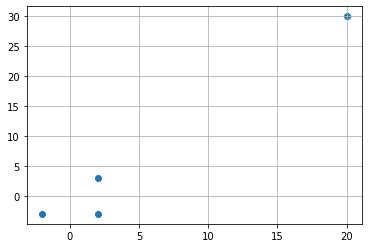

In [63]:
x = np.array([[2,3],[20,30],[-2,-3],[2,-3]])
plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.grid()
plt.show()

In [65]:
sc.squareform(sc.pdist(x,'euclidean'))


array([[ 0.        , 32.44996148,  7.21110255,  6.        ],
       [32.44996148,  0.        , 39.66106403, 37.58989226],
       [ 7.21110255, 39.66106403,  0.        ,  4.        ],
       [ 6.        , 37.58989226,  4.        ,  0.        ]])

### Canberra
$$\sum_i \frac{|u_i - v_i|}{|u_i| + |v_i|}$$

In [66]:
sc.squareform(sc.pdist(x,'canberra'))

array([[0.        , 1.63636364, 2.        , 1.        ],
       [1.63636364, 0.        , 2.        , 1.81818182],
       [2.        , 2.        , 0.        , 1.        ],
       [1.        , 1.81818182, 1.        , 0.        ]])

In [91]:
def pdistance(df,metric):
    D = sc.squareform(sc.pdist(df,metric))
    return D


In [92]:
pdistance(x,'euclidean')

array([[ 0.        , 32.44996148,  7.21110255,  6.        ],
       [32.44996148,  0.        , 39.66106403, 37.58989226],
       [ 7.21110255, 39.66106403,  0.        ,  4.        ],
       [ 6.        , 37.58989226,  4.        ,  0.        ]])

In [93]:
# Calcular las distancias por:
# Distacia Jaccard
# Distacia braycurtis
# Manhatan

### Estandarización de datos

$$z= \frac{x-\mu}{\sigma}$$

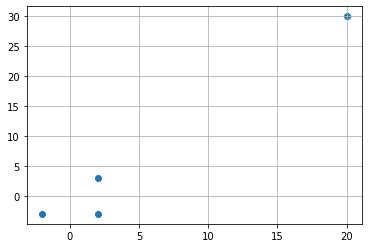

In [94]:
x
plt.figure()
plt.scatter(x[:,0],x[:,1])
plt.grid()
plt.show()

In [95]:
x

array([[ 2,  3],
       [20, 30],
       [-2, -3],
       [ 2, -3]])

In [96]:
x_std = (x-x.mean())/x.std()
x_std

array([[-0.36198227, -0.27422899],
       [ 1.21757673,  2.0951095 ],
       [-0.71299538, -0.80074866],
       [-0.36198227, -0.80074866]])

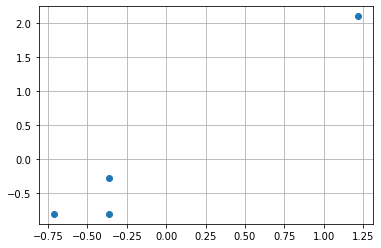

In [97]:
plt.figure()
plt.scatter(x_std[:,0],x_std[:,1])
plt.grid()
plt.show()

In [98]:
pdistance(x,'euclidean')

array([[ 0.        , 32.44996148,  7.21110255,  6.        ],
       [32.44996148,  0.        , 39.66106403, 37.58989226],
       [ 7.21110255, 39.66106403,  0.        ,  4.        ],
       [ 6.        , 37.58989226,  4.        ,  0.        ]])

In [99]:
sc.squareform(sc.pdist(x_std,'euclidean'))

array([[0.        , 2.84759047, 0.63279788, 0.52651966],
       [2.84759047, 0.        , 3.48038836, 3.29863625],
       [0.63279788, 3.48038836, 0.        , 0.35101311],
       [0.52651966, 3.29863625, 0.35101311, 0.        ]])

In [100]:
pdistance(x_std,'euclidean')

array([[0.        , 2.84759047, 0.63279788, 0.52651966],
       [2.84759047, 0.        , 3.48038836, 3.29863625],
       [0.63279788, 3.48038836, 0.        , 0.35101311],
       [0.52651966, 3.29863625, 0.35101311, 0.        ]])

In [101]:
pdistance(x,'seuclidean')

array([[0.        , 2.5053467 , 0.55674371, 0.38080849],
       [2.5053467 , 0.        , 3.06209041, 2.77973257],
       [0.55674371, 3.06209041, 0.        , 0.40613847],
       [0.38080849, 2.77973257, 0.40613847, 0.        ]])

### Similitud por Coseno

La función de similitud del coseno es:

$$\cos (\theta)=\frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\|\|\mathbf{B}\|}=\frac{\sum_{i=1}^{n} A_{i} B_{i}}{\sqrt{\sum_{i=1}^{n} A_{i}^{2}} \sqrt{\sum_{i=1}^{n} B_{i}^{2}}}\tag{1}$$

$ A $ y $ B $ representan los vectores y $ A_i $ o $ B_i $ representan el índice i de ese vector.
& Hay que tener en cuenta que si A y B son idénticos, se obtendrá $ cos (\theta) = 1 $.

* De lo contrario, si son totalmente opuestos, es decir, $ A = -B $, obtendría $ cos (\theta) = -1 $.
* Si obtiene $ cos (\ theta) = 0 $, eso significa que son ortogonales (o perpendiculares).
* Los números entre 0 y 1 indican una puntuación de similitud.
* Los números entre -1-0 indican una puntuación de disimilitud.

### Deducción

$$A\cdot B = ||A||||B||cos(\theta)$$

$$\frac{A\cdot B}{||A||||B||} = cos(\theta)= similaridad \in [-1,1]$$

$$d= 1 - similaridad = 1 - \frac{A\cdot B}{||A||||B||} \in \{0,2\}$$

In [104]:
def cosine_similarity(A,B):
    dot = np.dot(A,B)
    norm_a = np.sqrt(np.dot(A,A))
    norm_b = np.sqrt(np.dot(B,B))
    
    cos = dot/(norm_a*norm_b)
    
    return cos

In [105]:
def cosine_distance(A,B):
    dot = np.dot(A,B)
    norm_a = np.sqrt(np.dot(A,A))
    norm_b = np.sqrt(np.dot(B,B))
    
    cos = dot/(norm_a*norm_b)
    dist = 1 - cos
    return dist

In [106]:
A = np.array([1,5,7])
B = np.array([1,0,-8])


In [107]:
cosine_similarity(A,B)

-0.7877263614433762

In [108]:
cosine_distance(A,B)

1.7877263614433763

In [109]:
AB = np.array([[1,5,7],
              [1,0,-8]])
AB

array([[ 1,  5,  7],
       [ 1,  0, -8]])

In [110]:
sc.pdist(AB,'cosine')

array([1.78772636])

In [111]:
pdistance(AB,'cosine')

array([[0.        , 1.78772636],
       [1.78772636, 0.        ]])

In [112]:
x

array([[ 2,  3],
       [20, 30],
       [-2, -3],
       [ 2, -3]])

In [114]:
pd.DataFrame(pdistance(x,'seuclidean'))

,0,1,2,3
0,0.000000,2.505347,0.556744,0.380808
1,2.505347,0.000000,3.062090,2.779733
2,0.556744,3.062090,0.000000,0.406138
3,0.380808,2.779733,0.406138,0.000000


In [115]:
pd.DataFrame(pdistance(x,'cosine'))

,0,1,2,3
0,0.000000,0.000000,2.000000,1.384615
1,0.000000,0.000000,2.000000,1.384615
2,2.000000,2.000000,0.000000,0.615385
3,1.384615,1.384615,0.615385,0.000000


# ¿Qué pasa si mi dataset contiene todo tipo de datos?

# Datos Mixtos

Supongamos que sobre S muestras, representadas en la matriz $X$, se han observado simultáneamente diferentes muestras que por su naturaleza pueden corresponder a variables binarias,
cualitativas y cuantitativas. 

>La distancia entre individuos que presenten esta combinación de características puede ser medida a través de la similaridad de `Gower (1971)`. Esta similaridad es útil para tipos de datos mixtos.

La similaridad $\delta_{ijt}$ entre la $i$-ésima y la $j$-ésima muestra para la variable $t$, promediado sobre las $T$ variables o características, es la medida de similaridad propuesta por Grower (1971):

$$\delta_{ij}=\frac{1}{T} \delta_{ijt}$$

>En el caso de variables **binarias o cualitativas**, $\delta_{ijt}=1$ si $x_{it}=x_{jt}$ y $\delta_{ijt}=0$ si $x_{it}\neq x_{jt}$. 

>Si la variable es **cuantitativa** la similaridad entre los individuos estará dada por:

$$\delta_{ijt}=1-\frac{|x_{it} - x_{jt}|}{rt}$$

 donde $r_t$ es el rango (diferencia entre el máximo y el mínimo) de la $t$-ésima característica sobre toda la población. Si $x_{it}=x_{jt}$ entonces $\delta_{ijt}=1$, cuando $x_{it}$ y $x_{jt}$ se encuentan en los extremos de $r_t$ entonces $\delta_{ijt}=0$, y si $x_{it}$ y $x_{jt}$ son valores intermedios de $r_t$ entonces $0\leq \delta_{ijt} \leq 1$
 
 
 El tratamiento de los datos faltantes, la consideración de la ausencia simultánea de la característica, y la ponderación relativa de características, son debilidades metodológicas que afectan las medidas de similitud y distancias referidas hasta ahora para todo tipo de variables. 
 
 En este sentido, Gower introdujo en la expresión de la medida de similitud, ponderaciones denominadas $w_{ijt}$, como una función que
depende de cada par de datos $x_{it}$ y $x_{jt}$ , obteniendo la siguiente expresión general:

$$\delta_{ij} = \frac{\sum_{t=1}^T w_{ijt}\delta_{ijt}}{\sum_{t=1}^T w_{ijt}}$$

In [116]:
!pip install gower

## Ejemplo:

In [130]:
df = pd.DataFrame([[1,2.6,'A'],[12,5,'X'],[4,7,'A']])
df.columns=['Num_1','Num_2','Num_3']
df

,Num_1,Num_2,Num_3
0,1,2.6,A
1,12,5.0,X
2,4,7.0,A



1. Encontrar la distancia Manhattan entre cada muestra para las variables numéricas
2. Normalizar la matriz de similitud

In [134]:
sc.pdist(df[['Num_1']], 'cityblock')

array([11.,  3.,  8.])

In [137]:
delta_1 = sc.squareform(sc.pdist(df[['Num_1']], 'cityblock'))
delta_1

array([[ 0., 11.,  3.],
       [11.,  0.,  8.],
       [ 3.,  8.,  0.]])

In [138]:
np.ptp(df['Num_1'])

11

In [139]:
delta_1 = delta_1 / max(np.ptp(df['Num_1']),1)
delta_1

array([[0.        , 1.        , 0.27272727],
       [1.        , 0.        , 0.72727273],
       [0.27272727, 0.72727273, 0.        ]])

In [142]:
delta_2 = sc.squareform(sc.pdist(df[['Num_2']], 'cityblock'))/max(np.ptp(df['Num_2']),1)
delta_2

array([[0.        , 0.54545455, 1.        ],
       [0.54545455, 0.        , 0.45454545],
       [1.        , 0.45454545, 0.        ]])

Calcular la distancia de similitud para las variables categóricas. 

1. Primero hay que convertir las variables categoricas nominales a variables dummies y después calcular las distancias de similitud (DICE)

In [147]:
df

,Num_1,Num_2,Num_3
0,1,2.6,A
1,12,5.0,X
2,4,7.0,A


In [143]:
dummy_df = pd.get_dummies(df['Num_3'])
dummy_df

,A,X
0,1,0
1,0,1
2,1,0


In [144]:
delta_3 = sc.squareform(sc.pdist(dummy_df, 'dice'))
delta_3

array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 0.]])

As expected the matrix returns a value of 1 wherever if finds a non equal value.

In [145]:
w1=w2=w3=1

In [146]:
gower_sim = (w1*delta_1 + w2*delta_2 + w3*delta_3)/(w1+w2+w3)
gower_sim

array([[0.        , 0.84848485, 0.42424242],
       [0.84848485, 0.        , 0.72727273],
       [0.42424242, 0.72727273, 0.        ]])

In [ ]:
!pip install gower

In [152]:
#!pip install gower

In [151]:
help(gower.gower_matrix)

Help on function gower_matrix in module gower.gower_dist:

gower_matrix(data_x, data_y=None, weight=None, cat_features=None)



In [148]:
import gower

In [149]:
df

,Num_1,Num_2,Num_3
0,1,2.6,A
1,12,5.0,X
2,4,7.0,A


In [150]:
gower.gower_matrix(df)

array([[0.        , 0.8484848 , 0.4242424 ],
       [0.8484848 , 0.        , 0.72727275],
       [0.4242424 , 0.72727275, 0.        ]], dtype=float32)

## Ejemplo 2:

In [151]:
dictionary = {"age": [22, 25, 30, 38, 42, 47, 55, 62, 61, 90], 
              "gender": ["M", "M", "F", "F", "F", "M", "M", "M", "M", "M"], 
              "civil_status": ["SINGLE", "SINGLE", "SINGLE", "MARRIED", "MARRIED", "SINGLE", "MARRIED", "DIVORCED", "MARRIED", "DIVORCED"], 
              "salary": [18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000], 
"has_children": [False, False, False, True, True, False, False, False, False, True], 
              "purchaser_type": ["LOW_PURCHASER", "LOW_PURCHASER", "LOW_PURCHASER", "HEAVY_PURCHASER", "HEAVY_PURCHASER", "LOW_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "LOW_PURCHASER"]}

In [152]:
dictionary

{'age': [22, 25, 30, 38, 42, 47, 55, 62, 61, 90],
 'gender': ['M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', 'M'],
 'civil_status': ['SINGLE',
  'SINGLE',
  'SINGLE',
  'MARRIED',
  'MARRIED',
  'SINGLE',
  'MARRIED',
  'DIVORCED',
  'MARRIED',
  'DIVORCED'],
 'salary': [18000,
  23000,
  27000,
  32000,
  34000,
  20000,
  40000,
  42000,
  25000,
  70000],
 'has_children': [False,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  True],
 'purchaser_type': ['LOW_PURCHASER',
  'LOW_PURCHASER',
  'LOW_PURCHASER',
  'HEAVY_PURCHASER',
  'HEAVY_PURCHASER',
  'LOW_PURCHASER',
  'MEDIUM_PURCHASER',
  'MEDIUM_PURCHASER',
  'MEDIUM_PURCHASER',
  'LOW_PURCHASER']}

In [154]:
dataframe = pd.DataFrame(dictionary)
dataframe

,age,gender,civil_status,salary,has_children,purchaser_type
0,22,M,SINGLE,18000,False,LOW_PURCHASER
1,25,M,SINGLE,23000,False,LOW_PURCHASER
2,30,F,SINGLE,27000,False,LOW_PURCHASER
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER
5,47,M,SINGLE,20000,False,LOW_PURCHASER
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER
9,90,M,DIVORCED,70000,True,LOW_PURCHASER


In [156]:
new_cols = [f'customer_{c}' for c in range(0,len(dataframe))]
new_cols

['customer_0',
 'customer_1',
 'customer_2',
 'customer_3',
 'customer_4',
 'customer_5',
 'customer_6',
 'customer_7',
 'customer_8',
 'customer_9']

In [157]:
var=gower.gower_matrix(dataframe,data_y=None,weight=None,cat_features=None)
df_var=pd.DataFrame(var, columns = new_cols, index= new_cols)
df_var

,customer_0,customer_1,customer_2,customer_3,customer_4,customer_5,customer_6,customer_7,customer_8,customer_9
customer_0,0.000000,0.023379,0.215121,0.750754,0.766968,0.067685,0.484729,0.508296,0.451357,0.666667
customer_1,0.023379,0.000000,0.191742,0.727376,0.743590,0.063537,0.461350,0.484917,0.427979,0.643288
customer_2,0.215121,0.191742,0.000000,0.535634,0.551848,0.230769,0.602941,0.626508,0.582391,0.784879
customer_3,0.750754,0.727376,0.535634,0.000000,0.016214,0.727187,0.567308,0.757541,0.578808,0.749246
customer_4,0.766968,0.743590,0.551848,0.016214,0.000000,0.723793,0.551094,0.741327,0.575415,0.733032
customer_5,0.067685,0.063537,0.230769,0.727187,0.723793,0.000000,0.417044,0.440611,0.383673,0.598982
customer_6,0.484729,0.461350,0.602941,0.567308,0.551094,0.417044,0.000000,0.190234,0.062783,0.681938
customer_7,0.508296,0.484917,0.626508,0.757541,0.741327,0.440611,0.190234,0.000000,0.223605,0.491704
customer_8,0.451357,0.427979,0.582391,0.578808,0.575415,0.383673,0.062783,0.223605,0.000000,0.715309
customer_9,0.666667,0.643288,0.784879,0.749246,0.733032,0.598982,0.681938,0.491704,0.715309,0.000000


In [165]:
# escribir una función que tenga como arg de entrada la matriz de similitud y el customer, 
# que regres los 3 primeros customers más parecidos al customer de entrada

def customers_similares(mat_sim, customer,n_parecidos):
    customers_sim = mat_sim[customer].sort_values()
    return customers_sim[1:n_parecidos+1]

In [167]:
cst=customers_similares(df_var, 'customer_8',3)
cst

customer_6    0.062783
customer_7    0.223605
customer_5    0.383673
Name: customer_8, dtype: float32

In [173]:
pelis = pd.read_excel('Data/test_peliculas_2021.xlsx')
pelis.head()

,ID,Hora de inicio,Hora de finalización,Nombre,Total de puntos,Comentarios del cuestionario,Inteligencia Artificial,Puntos: Inteligencia Artificial,Comentarios: Inteligencia Artificial,Super Man,...,Comentarios: The shape of water,Aquaman,Puntos: Aquaman,Comentarios: Aquaman,El lobo de wall street,Puntos: El lobo de wall street,Comentarios: El lobo de wall street,Una serie de eventos desafortunados,Puntos: Una serie de eventos desafortunados,Comentarios: Una serie de eventos desafortunados
0,1,2020-02-05 10:04:44,2020-02-05 10:06:46,DIEGO ALBERTO LOPEZ LAZARENO,NaN,NaN,5.0,NaN,NaN,5.0,...,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
1,2,2020-02-05 10:03:34,2020-02-05 10:06:57,CHRISTIAN EDUARDO GONZALEZ REYES,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN
2,3,2020-02-05 10:04:15,2020-02-05 10:07:18,ESTEBAN MARQUEZ DELGADO,NaN,NaN,5.0,NaN,NaN,3.0,...,NaN,5.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN
3,4,2020-02-05 10:03:16,2020-02-05 10:07:24,ALEJANDRO MICHEL MARRON,NaN,NaN,5.0,NaN,NaN,3.0,...,NaN,3.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN
4,5,2020-02-05 10:02:57,2020-02-05 10:07:30,MARIANA BRIONES MARTINEZ,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN


In [174]:
from EDA import EDA as eda

In [175]:
eda.dqr(pelis)

,Nombres Columnas,Tipo de Dato,Valores nullos,Valores unicos,promedio,min,max,categorical,categorical unique
ID,ID,int64,0,119,60,1,119,False,NaN
Hora de inicio,Hora de inicio,datetime64[ns],0,111,2020-10-03 16:19:46.058822656,2020-02-05 10:02:49,2021-03-03 09:54:24,False,NaN
Hora de finalización,Hora de finalización,datetime64[ns],0,117,2020-10-03 16:23:59.453780992,2020-02-05 10:06:46,2021-03-03 09:58:03,False,NaN
Nombre,Nombre,object,24,94,NaN,NaN,NaN,True,more than 10
Total de puntos,Total de puntos,float64,119,0,NaN,NaN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...
Puntos: El lobo de wall street,Puntos: El lobo de wall street,float64,119,0,NaN,NaN,NaN,False,NaN
Comentarios: El lobo de wall street,Comentarios: El lobo de wall street,float64,119,0,NaN,NaN,NaN,False,NaN
Una serie de eventos desafortunados,Una serie de eventos desafortunados,float64,21,5,3.05102,1,5,False,NaN
Puntos: Una serie de eventos desafortunados,Puntos: Una serie de eventos desafortunados,float64,119,0,NaN,NaN,NaN,False,NaN


In [178]:
pelis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Columns: 243 entries, ID to Comentarios: Una serie de eventos desafortunados
dtypes: datetime64[ns](2), float64(239), int64(1), object(1)
memory usage: 226.0+ KB


In [179]:
pelis.head()

,ID,Hora de inicio,Hora de finalización,Nombre,Total de puntos,Comentarios del cuestionario,Inteligencia Artificial,Puntos: Inteligencia Artificial,Comentarios: Inteligencia Artificial,Super Man,...,Comentarios: The shape of water,Aquaman,Puntos: Aquaman,Comentarios: Aquaman,El lobo de wall street,Puntos: El lobo de wall street,Comentarios: El lobo de wall street,Una serie de eventos desafortunados,Puntos: Una serie de eventos desafortunados,Comentarios: Una serie de eventos desafortunados
0,1,2020-02-05 10:04:44,2020-02-05 10:06:46,DIEGO ALBERTO LOPEZ LAZARENO,NaN,NaN,5.0,NaN,NaN,5.0,...,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
1,2,2020-02-05 10:03:34,2020-02-05 10:06:57,CHRISTIAN EDUARDO GONZALEZ REYES,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,4.0,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN
2,3,2020-02-05 10:04:15,2020-02-05 10:07:18,ESTEBAN MARQUEZ DELGADO,NaN,NaN,5.0,NaN,NaN,3.0,...,NaN,5.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN
3,4,2020-02-05 10:03:16,2020-02-05 10:07:24,ALEJANDRO MICHEL MARRON,NaN,NaN,5.0,NaN,NaN,3.0,...,NaN,3.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN,NaN
4,5,2020-02-05 10:02:57,2020-02-05 10:07:30,MARIANA BRIONES MARTINEZ,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN


In [186]:
c_inicial = np.array([0,3])

c_fin = np.arange(6,pelis.shape[1],3)


In [187]:
c = np.append(c_inicial,c_fin)

In [189]:
peliculas = pelis.iloc[:,c]
peliculas

,ID,Nombre,Inteligencia Artificial,Super Man,E.T.,Interestelar,Mr. Nobody,Star Wars,V de Vendeta,Avatar,...,El señor de los anillos,Harry Potter,Blanca Nieves,Big fish,Narnia,El laberinto del fauno,The shape of water,Aquaman,El lobo de wall street,Una serie de eventos desafortunados
0,1,DIEGO ALBERTO LOPEZ LAZARENO,5.0,5.0,5.0,5.0,NaN,4.0,NaN,2.0,...,5.0,4.0,5.0,NaN,2.0,NaN,4.0,4.0,5.0,NaN
1,2,CHRISTIAN EDUARDO GONZALEZ REYES,NaN,4.0,3.0,3.0,NaN,5.0,4.0,4.0,...,3.0,4.0,5.0,1.0,3.0,NaN,NaN,4.0,4.0,3.0
2,3,ESTEBAN MARQUEZ DELGADO,5.0,3.0,4.0,3.0,2.0,5.0,2.0,5.0,...,5.0,5.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0
3,4,ALEJANDRO MICHEL MARRON,5.0,3.0,3.0,3.0,2.0,4.0,5.0,5.0,...,5.0,5.0,2.0,4.0,4.0,5.0,4.0,3.0,5.0,4.0
4,5,MARIANA BRIONES MARTINEZ,NaN,4.0,5.0,3.0,NaN,1.0,NaN,4.0,...,1.0,5.0,5.0,NaN,5.0,2.0,5.0,5.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,115,RICARDO SALAS VENEGAS,5.0,5.0,5.0,5.0,1.0,2.0,1.0,5.0,...,1.0,4.0,1.0,1.0,4.0,5.0,1.0,1.0,5.0,1.0
115,116,GERARDO GONZALEZ FLORES,NaN,4.0,4.0,NaN,NaN,5.0,NaN,5.0,...,3.0,5.0,5.0,NaN,5.0,NaN,4.0,5.0,4.0,NaN
116,117,ANA FLORENCIA GUERRERO GONZALEZ,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,...,1.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0
117,118,BERLIN ISABEL PRECIADO ESCALERA,1.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,...,4.0,5.0,1.0,1.0,3.0,3.0,1.0,1.0,5.0,4.0


In [203]:
peliculas.dropna(subset=['Nombre'],inplace=True)

<ipython-input-203-c51da9514707>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peliculas.dropna(subset=['Nombre'],inplace=True)


In [209]:
peliculas_puntajes= peliculas.iloc[:,2:].fillna(3)

In [210]:
peliculas_puntajes

,Inteligencia Artificial,Super Man,E.T.,Interestelar,Mr. Nobody,Star Wars,V de Vendeta,Avatar,Contacto,El Origen (Inception),...,El señor de los anillos,Harry Potter,Blanca Nieves,Big fish,Narnia,El laberinto del fauno,The shape of water,Aquaman,El lobo de wall street,Una serie de eventos desafortunados
0,5.0,5.0,5.0,5.0,3.0,4.0,3.0,2.0,3.0,5.0,...,5.0,4.0,5.0,3.0,2.0,3.0,4.0,4.0,5.0,3.0
1,3.0,4.0,3.0,3.0,3.0,5.0,4.0,4.0,3.0,3.0,...,3.0,4.0,5.0,1.0,3.0,3.0,3.0,4.0,4.0,3.0
2,5.0,3.0,4.0,3.0,2.0,5.0,2.0,5.0,2.0,2.0,...,5.0,5.0,2.0,2.0,4.0,2.0,2.0,5.0,3.0,2.0
3,5.0,3.0,3.0,3.0,2.0,4.0,5.0,5.0,3.0,4.0,...,5.0,5.0,2.0,4.0,4.0,5.0,4.0,3.0,5.0,4.0
4,3.0,4.0,5.0,3.0,3.0,1.0,3.0,4.0,3.0,3.0,...,1.0,5.0,5.0,3.0,5.0,2.0,5.0,5.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,5.0,5.0,5.0,5.0,1.0,2.0,1.0,5.0,3.0,5.0,...,1.0,4.0,1.0,1.0,4.0,5.0,1.0,1.0,5.0,1.0
115,3.0,4.0,4.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,3.0,5.0,5.0,3.0,5.0,3.0,4.0,5.0,4.0,3.0
116,3.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,4.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0
117,1.0,3.0,1.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,4.0,5.0,1.0,1.0,3.0,3.0,1.0,1.0,5.0,4.0


## Creando la matriz de similitu

In [229]:
col_id = peliculas['ID'].to_list()


In [230]:
mat_sim_pelis = pdistance(peliculas_puntajes, 'cosine')
mat_sim_pelis = pd.DataFrame(mat_sim_pelis, index=col_id, columns=col_id)
mat_sim_pelis

,1,2,3,4,5,6,7,8,9,10,...,110,111,112,113,114,115,116,117,118,119
1,0.000000,0.111794,0.087374,0.126485,0.080495,0.133333,0.055644,0.045906,0.086573,0.107544,...,0.071595,0.087701,0.177202,0.077615,0.135336,0.144893,0.064604,0.243990,0.207354,0.209914
2,0.111794,0.000000,0.120693,0.142692,0.114921,0.153659,0.076201,0.078095,0.137001,0.113177,...,0.089751,0.127336,0.193544,0.108052,0.126748,0.167887,0.078765,0.245883,0.213244,0.212720
3,0.087374,0.120693,0.000000,0.132173,0.103411,0.130772,0.076582,0.078130,0.102104,0.120849,...,0.087396,0.115671,0.201646,0.110128,0.157352,0.192026,0.061088,0.251928,0.239980,0.185890
4,0.126485,0.142692,0.132173,0.000000,0.129373,0.143833,0.090913,0.096905,0.115281,0.131110,...,0.083623,0.105024,0.196800,0.094194,0.161925,0.201719,0.114650,0.285155,0.243488,0.225962
5,0.080495,0.114921,0.103411,0.129373,0.000000,0.072534,0.057945,0.047339,0.059698,0.091222,...,0.089353,0.113044,0.197434,0.071329,0.108331,0.174910,0.041360,0.156703,0.183780,0.092086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.144893,0.167887,0.192026,0.201719,0.174910,0.230734,0.139178,0.129065,0.194423,0.175335,...,0.175517,0.208751,0.210267,0.193629,0.165697,0.000000,0.150539,0.280125,0.189920,0.257695
116,0.064604,0.078765,0.061088,0.114650,0.041360,0.085978,0.033461,0.032098,0.056116,0.065652,...,0.059363,0.078291,0.170897,0.058489,0.109420,0.150539,0.000000,0.192551,0.174522,0.129184
117,0.243990,0.245883,0.251928,0.285155,0.156703,0.172138,0.203314,0.199165,0.190893,0.183824,...,0.228759,0.248211,0.288083,0.181480,0.187542,0.280125,0.192551,0.000000,0.256757,0.177473
118,0.207354,0.213244,0.239980,0.243488,0.183780,0.240547,0.173335,0.189355,0.208799,0.186413,...,0.220270,0.242636,0.270405,0.201401,0.162618,0.189920,0.174522,0.256757,0.000000,0.219147


In [207]:
col_nombres = peliculas['Nombre'].to_list()


In [208]:
col_nombres

['DIEGO ALBERTO LOPEZ LAZARENO',
 'CHRISTIAN EDUARDO GONZALEZ REYES',
 'ESTEBAN MARQUEZ DELGADO',
 'ALEJANDRO MICHEL MARRON',
 'MARIANA BRIONES MARTINEZ',
 'LYHA ESPINOSA GARCIA',
 'PABLO ALEJANDRO RIVERA SANCHEZ',
 'CARLOS CUEVAS MENDOZA',
 'EDUARDO LOZA DE LA TORRE',
 'CARLOS ALBERTO RAYAS OROZCO',
 'ANA CRISTINA VAZQUEZ VARGAS',
 'FRANCISCO JAVIER BARRAGAN GARCIA',
 'JUAN ENRIQUE AGUIRRE LOPEZ',
 'PABLO ANDRES DUARTE ROBLES',
 'LUIS CARLOS ALVARADO GARNICA',
 'RENATTA GARCIA SANCHEZ',
 'JULIO OLAF GONZALEZ GUZMAN',
 'GADDIEL DESIRENA LOPEZ',
 'PABLO HUMBERTO MUÑOZ CUEVAS',
 'OSCAR GERMAN VILLA DOMINGUEZ',
 'MIGUEL DE JESUS AGUIRRE OROZCO',
 'ANDRES ENCARNACION DELGADO',
 'SEAN NICOLAS GONZALEZ VAZQUEZ',
 'SANTIAGO ROMERO RIGGEN',
 'MATEO VEREA DORANTES',
 'CLAUDIA ESTEFANIA MEZA FONSECA',
 'ANDREA FLORES FERNANDEZ',
 'MIGUEL MORENO MORRILL',
 'LEONARDO MACIAS NAVARRO',
 'ALFREDO RODRIGUEZ NAVAR',
 'DIEGO ECHEVERRIA VILLASEÑOR',
 'ANDRES RAMIREZ VILLANUEVA',
 'TANIA BELL NICHOLLS',
 

In [212]:
nombres = peliculas[['ID','Nombre']].set_index('ID').T.to_dict('list')
nombres

{1: ['DIEGO ALBERTO LOPEZ LAZARENO'],
 2: ['CHRISTIAN EDUARDO GONZALEZ REYES'],
 3: ['ESTEBAN MARQUEZ DELGADO'],
 4: ['ALEJANDRO MICHEL MARRON'],
 5: ['MARIANA BRIONES MARTINEZ'],
 6: ['LYHA ESPINOSA GARCIA'],
 7: ['PABLO ALEJANDRO RIVERA SANCHEZ'],
 8: ['CARLOS CUEVAS MENDOZA'],
 9: ['EDUARDO LOZA DE LA TORRE'],
 10: ['CARLOS ALBERTO RAYAS OROZCO'],
 11: ['ANA CRISTINA VAZQUEZ VARGAS'],
 12: ['FRANCISCO JAVIER BARRAGAN GARCIA'],
 13: ['JUAN ENRIQUE AGUIRRE LOPEZ'],
 14: ['PABLO ANDRES DUARTE ROBLES'],
 15: ['LUIS CARLOS ALVARADO GARNICA'],
 16: ['RENATTA GARCIA SANCHEZ'],
 17: ['JULIO OLAF GONZALEZ GUZMAN'],
 18: ['GADDIEL DESIRENA LOPEZ'],
 19: ['PABLO HUMBERTO MUÑOZ CUEVAS'],
 20: ['OSCAR GERMAN VILLA DOMINGUEZ'],
 21: ['MIGUEL DE JESUS AGUIRRE OROZCO'],
 22: ['ANDRES ENCARNACION DELGADO'],
 23: ['SEAN NICOLAS GONZALEZ VAZQUEZ'],
 24: ['SANTIAGO ROMERO RIGGEN'],
 25: ['MATEO VEREA DORANTES'],
 26: ['CLAUDIA ESTEFANIA MEZA FONSECA'],
 27: ['ANDREA FLORES FERNANDEZ'],
 28: ['MIGUEL MO

In [231]:
nombres[1]

['DIEGO ALBERTO LOPEZ LAZARENO']

In [240]:
nombres.get(116)

['GERARDO GONZALEZ FLORES']

In [280]:
def customers_similarity(mat_sim, customer, n_parecidos, nombres):
    print(nombres[customer])
    customers_sim = mat_sim[customer].sort_values()
    customers_sim_df = pd.DataFrame(customers_sim)
    cust = customers_sim_df[1:n_parecidos+1]
    
    for i in cust.index.to_list():
        cust.loc[i,'Nombres'] = nombres.get(i)
    
    return cust

In [281]:
salida = customers_similarity(mat_sim_pelis, 40,3,nombres)
salida


['CARLOS DANIEL PEREZ HERNANDEZ']


/home/gaddiel/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/gaddiel/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1760: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)


,40,Nombres
30,0.120882,ALFREDO RODRIGUEZ NAVAR
59,0.123593,PALOMA RODRIGUEZ MEDEL
13,0.123608,JUAN ENRIQUE AGUIRRE LOPEZ


In [282]:
user_id = 40
user_sim_id = 30

In [285]:
peliculas_puntajes.iloc[40]

Inteligencia Artificial                1.0
Super Man                              5.0
E.T.                                   2.0
Interestelar                           5.0
Mr. Nobody                             1.0
                                      ... 
El laberinto del fauno                 3.0
The shape of water                     3.0
Aquaman                                5.0
El lobo de wall street                 5.0
Una serie de eventos desafortunados    1.0
Name: 40, Length: 79, dtype: float64

In [286]:
peliculas_puntajes.iloc[30]

Inteligencia Artificial                4.0
Super Man                              4.0
E.T.                                   4.0
Interestelar                           4.0
Mr. Nobody                             3.0
                                      ... 
El laberinto del fauno                 3.0
The shape of water                     4.0
Aquaman                                4.0
El lobo de wall street                 4.0
Una serie de eventos desafortunados    4.0
Name: 30, Length: 79, dtype: float64

In [310]:
User = peliculas_puntajes.iloc[40] > 3

In [311]:
User

Inteligencia Artificial                False
Super Man                               True
E.T.                                   False
Interestelar                            True
Mr. Nobody                             False
                                       ...  
El laberinto del fauno                 False
The shape of water                     False
Aquaman                                 True
El lobo de wall street                  True
Una serie de eventos desafortunados    False
Name: 40, Length: 79, dtype: bool

In [312]:
User_sim = peliculas_puntajes.iloc[30]
User_sim

Inteligencia Artificial                4.0
Super Man                              4.0
E.T.                                   4.0
Interestelar                           4.0
Mr. Nobody                             3.0
                                      ... 
El laberinto del fauno                 3.0
The shape of water                     4.0
Aquaman                                4.0
El lobo de wall street                 4.0
Una serie de eventos desafortunados    4.0
Name: 30, Length: 79, dtype: float64

In [315]:
indx_rec = (User_sim > 4)& (User==0)


In [316]:
list(User.index[indx_rec])[:3]

['Titanic', 'A star is born', 'Intensa-mente']